In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14, 'figure.figsize': (20,9)})

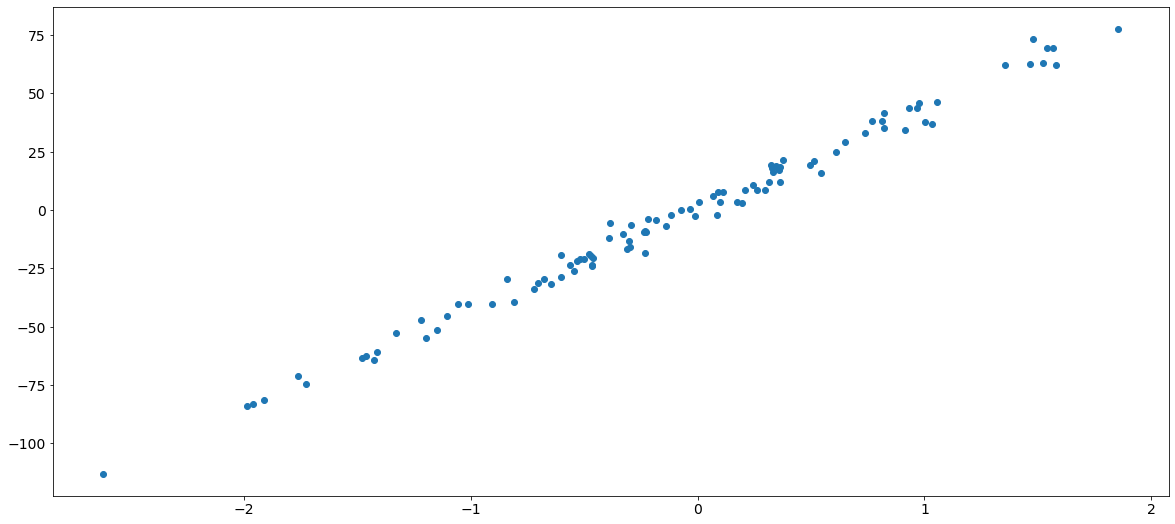

In [4]:
X, y = make_regression(n_samples=100, n_features=1, noise=4.2)
plt.scatter(X,y)
plt.show()

Fit a regression line like $f(x) = \theta_0 + \theta_1 x_1$ where $\theta_0$ is the bias. <br>
Extend the input vector for a constant bias: $x_0 = 1$ for each sample.

Error function: $J(x) = \frac{1}{n}\sum\limits_{i=1}^{n}(f(x) - y)^2$ which is the mean square error (MSE). <br>

Partial derivatives for the feature and bias are as follows. <br>

Bias coefficient $\theta_0$:
\begin{align}
    \frac{\partial}{\partial\theta_0} J(x) &= \frac{1}{n}\sum\limits_{i=1}^{n}(f(x) - y)^2 \newline
    &= \frac{1}{n}\sum\limits_{i=1}^{n}(\theta_0 x_0 + \theta_1 x - y)^2 \newline 
    &= \frac{2}{n}\sum\limits_{i=1}^{n}(\theta_0 x_0 + \theta_1 x - y) \cdot x_0 \newline
\end{align}

Feature coefficient $\theta_1$:
\begin{align}
    \frac{\partial}{\partial\theta_1} J(x) &= \frac{1}{n}\sum\limits_{i=1}^{n}(f(x) - y)^2 \newline
    &= \frac{1}{n}\sum\limits_{i=1}^{n}(\theta_0 b + \theta_1 x - y)^2 \newline 
    &= \frac{2}{n}\sum\limits_{i=1}^{n}(\theta_0 b + \theta_1 x - y) \cdot x \newline
\end{align}

Vector form:
\begin{align}
    \begin{bmatrix}
       \frac{\partial}{\partial\theta_0} J(x)\newline
        \frac{\partial}{\partial\theta_1} J(x)
     \end{bmatrix}
     &= \frac{2}{n} 
         \begin{bmatrix}
             x_0 \newline
             x_1
         \end{bmatrix}^T
         \left(
             \begin{bmatrix}
                 x_0 \newline
                 x_1
             \end{bmatrix}
         \begin{bmatrix}
             \theta_0 \newline
             \theta_1
         \end{bmatrix}- y
     \right)
\end{align}

In [5]:
# random init. theta
theta = np.random.random(2).reshape(-1, 1)

In [6]:
def compute_linear_regression_gradients(current_theta, samples, targets, n_samples):
    gradients = 2/n_samples * np.dot(samples.T, (np.dot(samples, current_theta) - y))
    return gradients

In [7]:
def f_linear_regression(x, theta):
    # include bias
    x_b = np.hstack((np.array([1.0] * len(x_vals)).reshape(-1, 1), x_vals.reshape(-1, 1)))
    # predicted value
    return x_b.dot(theta)

In [8]:
bias = np.array([1] * len(y)).reshape(-1, 1)
data = np.hstack((bias, X))
y = y.reshape(-1, 1)

In [9]:
iterations = 200
lambda_val = 0.01

for i in range(iterations):
    gradients = compute_linear_regression_gradients(theta, data, y, len(y))
    theta = theta - lambda_val *  gradients

In [10]:
# x_vals = np.linspace(-4, 4, 50)
x_vals = np.array([-4, 4])
f_x = f_linear_regression(x_vals, theta)

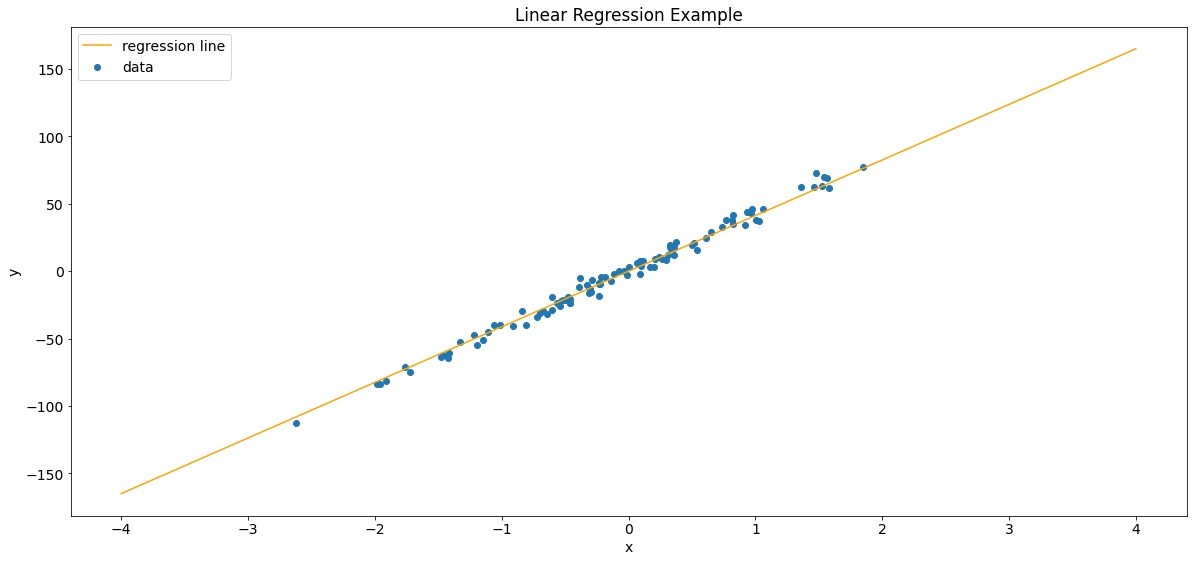

In [11]:
plt.scatter(X, y, label='data')
plt.plot(x_vals, f_x, label='regression line', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.savefig('plots/linear_regression_plot.pdf', bbox_inches='tight')
plt.show()